# <h1><center>Introduciton to Geopandas</center></h1>

In this tutorial part, we will learn the basics of loading and processing geographic data using Geopandas. Geopandas is built on top of Pandas and Numpy libraries. Like Pandas Dataframe, Geopandas data structure contains GeodataFrame and GeoSeries. Geopandas provides not only the capability to read and manipulate geographic data easily but also can perform many essential geospatial operations including among others geometric operations and projections which it borrows from the Shapely library. 

You can visualize and plot maps with Geopandas (provides a high-level interface to Matplotlib library) by using the plot() method on GeodataFrame/GeoSeries. In the first section, we will learn about geographic data, geographic coordinates and loading/writing geospatial data. 

Let us install first some libraries

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (1,936 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../python3-numpy_

### Learning Objectives:
1. Read and write geographic data in Geopandas.
2. Read csv files and convert into Geopandas GeodataFrame.
3. Project and set Coordinate reference systems (CRS).

In [ ]:
pip install -U plotly

     |████████████████████████████████| 19.1MB 30.3MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
pip install geojson-rewind

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px
from urllib.request import urlopen
import json
from matplotlib.colors import LightSource
from geojson_rewind import rewind
import plotly.io as pio


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##Lower Chamber for CA
assembly = gpd.read_file(
    "/content/drive/My Drive/cb_2020_06_sldl_500k/cb_2020_06_sldl_500k.shp"
)
print(assembly.columns)

Index(['STATEFP', 'SLDLST', 'AFFGEOID', 'GEOID', 'NAME', 'NAMELSAD', 'STUSPS',
       'STATE_NAME', 'LSAD', 'LSY', 'ALAND', 'AWATER', 'geometry'],
      dtype='object')


In [ ]:
##Upper Chamber for CA
senate = gpd.read_file(
    "/content/drive/My Drive/cb_2019_06_sldu_500k/cb_2019_06_sldu_500k.shp"
)
print(senate.columns)

Index(['STATEFP', 'SLDUST', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'LSY',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')


In [ ]:
assembly_pov = pd.read_csv("/content/drive/My Drive/pov_by_assembly_clean.csv")
assembly_pov = assembly_pov.rename(columns={
    "Assembly District Number": "SLDLST"
})
assembly_pov["SLDLST"] = assembly_pov.SLDLST.astype(int)

In [ ]:
senate_pov = pd.read_csv("/content/drive/My Drive/pov_by_senate_clean.csv")
senate_pov = senate_pov.rename(columns={
    "Senate District Number": "SLDUST"
})
senate_pov.columns

Index(['SLDUST', 'poverty_base', 'poverty_reform', 'deep_poverty_base',
       'deep_poverty_reform', 'pct_change', 'pct_change_deep',
       'child_poverty_base', 'child_poverty_reform', 'child_deep_poverty_base',
       'child_deep_poverty_reform', 'child_pct_change',
       'child_pct_change_deep'],
      dtype='object')

In [ ]:
senate["SLDUST"] = senate.SLDUST.astype(int)
assembly["SLDLST"]= assembly["SLDLST"].astype(int)
assembly = assembly.sort_values("SLDLST")
senate = senate.sort_values("SLDUST")
merged_assembly = assembly.merge(assembly_pov, on= "SLDLST")
merged_senate = senate.merge(senate_pov, on= "SLDUST")

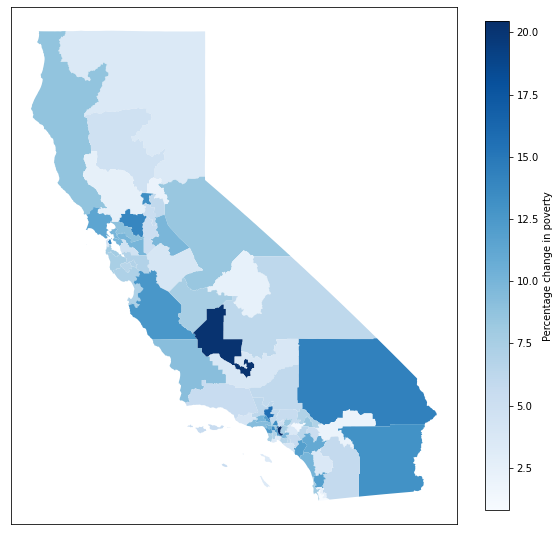

In [ ]:
overall_poverty_fig = assembly.plot(column=(merged_assembly["pct_change"]*100), legend = True, cmap = "Blues",
                    legend_kwds={
                        'label': "Percentage change in poverty",
                        'shrink': 0.9
                        }, figsize=(10, 10))
overall_poverty_fig.axes.get_xaxis().set_visible(False)
overall_poverty_fig.axes.get_yaxis().set_visible(False)

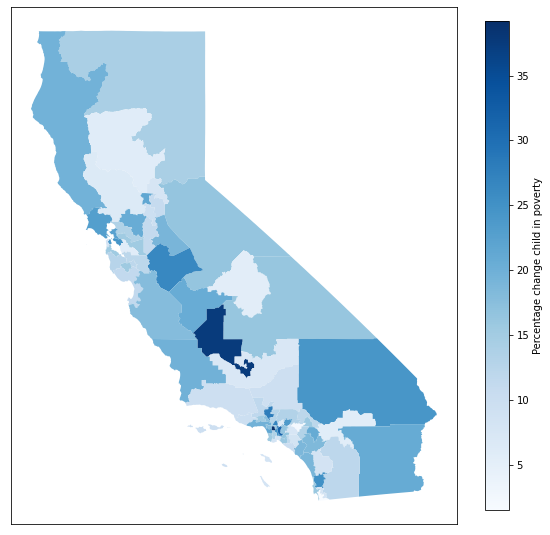

In [ ]:
child_poverty_fig = assembly.plot(column=(merged_assembly["child_pct_change"]*100), legend = True, cmap = "Blues",
                    legend_kwds={
                        'label': "Percentage change child in poverty",
                        'shrink': 0.9
                        }, figsize=(10, 10))
child_poverty_fig.axes.get_xaxis().set_visible(False)
child_poverty_fig.axes.get_yaxis().set_visible(False)

In [ ]:
assembly.to_file("/content/GeoJSON_file", driver = "GeoJSON")
with open("/content/GeoJSON_file") as geofile:
  j_file_assembly = json.load(geofile)

In [ ]:
senate.to_file("/content/GeoJSON_file", driver = "GeoJSON")
with open("/content/GeoJSON_file") as geofile:
  j_file_senate = json.load(geofile)

In [ ]:
i=1
for feature in j_file_assembly["features"]:
        feature['id'] = str(i)
        i += 1

In [ ]:
i=1
for feature in j_file_senate["features"]:
        feature['id'] = str(i)
        i += 1

In [ ]:
regions_rewound = rewind(j_file_assembly, rfc7946=False)

In [ ]:
from google.colab import files 

In [ ]:
merged_assembly["pct_change_100"] = (merged_assembly["pct_change"]*-100).round(1)
merged_assembly["poverty_base_100"] = (merged_assembly["poverty_base"]*100).round(1)
merged_assembly["poverty_reform_100"] = (merged_assembly["poverty_reform"]*100).round(1)

In [ ]:
merged_assembly["child_pct_change_100"] = (merged_assembly["child_pct_change"]*-100).round(1)
merged_assembly["child_poverty_base_100"] = (merged_assembly["child_poverty_base"]*100).round(1)
merged_assembly["child_poverty_reform_100"] = (merged_assembly["child_poverty_reform"]*100).round(1)
merged_assembly["assembly_string"] = "Assembly District " + merged_assembly.SLDLST.astype(str)

In [ ]:
merged_senate["pct_change_100"] = (merged_senate["pct_change"]*-100).round(1)
merged_senate["poverty_base_100"] = (merged_senate["poverty_base"]*100).round(1)
merged_senate["poverty_reform_100"] = (merged_senate["poverty_reform"]*100).round(1)
merged_senate["senate_string"] = "Senate District " + merged_senate.SLDUST.astype(str)

In [ ]:
merged_senate["child_pct_change_100"] = merged_senate["child_pct_change"]*-100
merged_senate["child_poverty_base_100"] = (merged_senate["child_poverty_base"]*100).round(1)
merged_senate["child_poverty_reform_100"] = (merged_senate["child_poverty_reform"]*100).round(1)

In [ ]:
pov_assembly_map = px.choropleth(merged_assembly, color="pct_change_100", geojson=j_file_assembly,locations="SLDLST", 
                              labels={
                                  'pct_change_100':'% change in poverty',
                                  "poverty_base_100" : "Base poverty rate",
                                  "poverty_reform_100" : "Reform poverty rate",
                                  "SLDLST" : "Assembly District Number"
                                      }, 
                            color_continuous_scale="blues_r", 
                            scope="usa", hover_data={
                                "pct_change_100",
                                "poverty_base_100",
                                "poverty_reform_100",
                            })  
pov_assembly_map.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
    )
)
pov_assembly_map.update_traces(hovertemplate= 
    "<b>" + + merged_assembly.assembly_string + "</b>" + "<br>" +
    "Change in poverty: " + merged_assembly.pct_change_100.astype(str) + "%" + "<br>" +
    "Poverty base: " + merged_assembly.poverty_base_100.astype(str) + "%" + "<br>" +
    "Poverty reform: " + merged_assembly.poverty_reform_100.astype(str) + "%"
    ) 
pov_assembly_map.update_layout(title_text="Change in poverty by Assembly District", title_x=0.225)
pov_assembly_map.update_geos(fitbounds="locations", visible=False)
pov_assembly_map.show()

In [ ]:
pov_child_assembly_map = px.choropleth(merged_assembly, color="child_pct_change_100", geojson=j_file_assembly,locations="SLDLST", 
                              labels={
                                  'child_pct_change_100':'% change in child poverty',
                                  "child_poverty_base_100" : "Base poverty rate",
                                  "child_poverty_reform_100" : "Reform poverty rate",
                                  "SLDLST" : "Assembly District Number"
                                      }, 
                            color_continuous_scale="blues_r", 
                            scope="usa", hover_data={
                                "child_pct_change_100",
                                "child_poverty_base_100",
                                "child_poverty_reform_100",
                            },
                            hover_name="assembly_string")  
pov_child_assembly_map.update_layout(title_text="Change in child poverty by Assembly District", 
        title_x=0.225,
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        
    )
)
pov_child_assembly_map.update_traces(hovertemplate= 
    "<b>" + + merged_assembly.assembly_string + "</b>" + "<br>" +
    "Change in child poverty: " + merged_assembly.child_pct_change_100.astype(str) + "%" + "<br>" +
    "Child poverty base: " + merged_assembly.child_poverty_base_100.astype(str) + "%" + "<br>" +
    "Child poverty reform: " + merged_assembly.child_poverty_reform_100.astype(str) + "%"
    ) 
pov_child_assembly_map.update_geos(fitbounds="locations", visible=False)
pov_child_assembly_map.show()

In [ ]:
pio.write_html(pov_assembly_map, 'pov_assembly_map.html')

In [ ]:
pio.write_html(pov_child_assembly_map, 'pov_child_assembly_map.html')

In [ ]:
pov_senate_map = px.choropleth(merged_senate, color="pct_change_100", geojson=j_file_senate,locations="SLDUST", 
                              labels={
                                  'pct_change_100':'% change in poverty',
                                  "poverty_base_100" : "Base poverty rate",
                                  "poverty_reform_100" : "Reform poverty rate",
                                  "SLDUST" : "Senate District Number"
                                      }, 
                            color_continuous_scale="blues_r", 
                            scope="usa", hover_data={
                                "pct_change_100",
                                "poverty_base_100",
                                "poverty_reform_100",
                            }) 
pov_senate_map.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
    )
)
pov_senate_map.update_traces(hovertemplate= 
    "<b>" + + merged_senate.senate_string + "</b>" + "<br>" +
    "Change in poverty: " + merged_assembly.pct_change_100.astype(str) + "%" + "<br>" +
    "Poverty base: " + merged_assembly.poverty_base_100.astype(str) + "%" + "<br>" +
    "Poverty reform: " + merged_assembly.poverty_reform_100.astype(str) + "%"
    ) 
pov_senate_map.update_geos(fitbounds="locations", visible=False)
pov_senate_map.update_layout(title_text="Change in poverty by Senate District", title_x=0.225)
pov_senate_map.show()

In [ ]:
pov_child_senate_map = px.choropleth(merged_senate, color="child_pct_change_100", geojson=j_file_senate,locations="SLDUST", 
                              labels={
                                  'child_pct_change_100':'% change in child poverty',
                                  "child_poverty_base_100" : "Base poverty rate",
                                  "child_poverty_reform_100" : "Reform poverty rate",
                                  "SLDUST" : "Senate District Number"
                                      }, 
                            color_continuous_scale="blues_r", 
                            scope="usa", hover_data={
                                "child_pct_change_100",
                                "child_poverty_base_100",
                                "child_poverty_reform_100",
                            }) 
pov_child_senate_map.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
    )
)
pov_child_senate_map.update_traces(hovertemplate= 
    "<b>" + + merged_senate.senate_string + "</b>" + "<br>" +
    "Change child in poverty: " + merged_assembly.child_pct_change_100.astype(str) + "%" + "<br>" +
    "Child poverty base: " + merged_assembly.child_poverty_base_100.astype(str) + "%" + "<br>" +
    "Child poverty reform: " + merged_assembly.child_poverty_reform_100.astype(str) + "%"
    ) 
pov_child_senate_map.update_geos(fitbounds="locations", visible=False)
pov_child_senate_map.update_layout(title_text="Change in child poverty by Senate District", title_x=0.225)
pov_child_senate_map.show()

In [ ]:
pio.write_html(pov_senate_map, 'pov_senate_map.html')

In [ ]:
pio.write_html(pov_child_senate_map, 'pov_child_senate_map.html')

In [ ]:
## animation_frame
## pov_child_assembly_map.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "surface"],
                    label="3D Surface",
                    method="restyle"
                ),
                dict(
                    args=["type", "heatmap"],
                    label="Heatmap",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# END